In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("Iris.csv", index_col = "Id")
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
X = data.drop('Species', axis = 1).to_numpy()
y = data['Species'].to_numpy()

In [4]:
# Data Preprocessing

onehot_encoder = OneHotEncoder(sparse_output=False)
scaler = StandardScaler()

enc_y = onehot_encoder.fit_transform(y.reshape(-1,1))
scl_X = scaler.fit_transform(X)

In [6]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(
    scl_X, enc_y, test_size=0.2, shuffle=True, stratify=enc_y, random_state=99
)

In [7]:
X_train.shape

(120, 4)

In [8]:
y_test.shape

(30, 3)

### Model Creation and complie

In [9]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

2025-03-24 07:57:52.980067: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-24 07:57:52.988470: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1742782372.997991   10935 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1742782373.000977   10935 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-24 07:57:53.011423: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [10]:
model = Sequential()

model.add(Input(shape = (X_train.shape[-1],)))
model.add(Dense(64, activation='leaky_relu'))
model.add(Dense(64, activation='leaky_relu'))
model.add(Dense(3, activation='softmax'))

I0000 00:00:1742782373.891165   10935 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1197 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,675 (18.26 KB)

 Trainable params: 4,675 (18.26 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.compile(optimizer="SGD", loss="categorical_crossentropy", metrics=['accuracy', 'f1_score'])

In [13]:
history = model.fit(
    X_train, y_train, epochs=25, batch_size=64, verbose=1
)

Epoch 1/25


I0000 00:00:1742782374.584287   11036 service.cc:148] XLA service 0x71f11c015af0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1742782374.584440   11036 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2025-03-24 07:57:54.615475: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1742782374.643451   11036 cuda_dnn.cc:529] Loaded cuDNN version 90300


3/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2639 - f1_score: 0.2336 - loss: 1.1292

I0000 00:00:1742782375.408281   11036 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 236ms/step - accuracy: 0.2683 - f1_score: 0.2333 - loss: 1.1260
Epoch 2/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4150 - f1_score: 0.3464 - loss: 1.0766
Epoch 3/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4672 - f1_score: 0.2847 - loss: 1.0358
Epoch 4/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6158 - f1_score: 0.4155 - loss: 0.9866
Epoch 5/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7587 - f1_score: 0.6189 - loss: 0.9444
Epoch 6/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7832 - f1_score: 0.6367 - loss: 0.9059
Epoch 7/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8040 - f1_score: 0.6570 - loss: 0.8749 
Epoch 8/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8081 - f1_score: 0.8074 - loss: 0.8557
Epoch 9/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8309 - f1_score: 0.6844 - loss: 0.8198
Epoch 10/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8133 - f1_score: 0.7958 - loss: 0.79

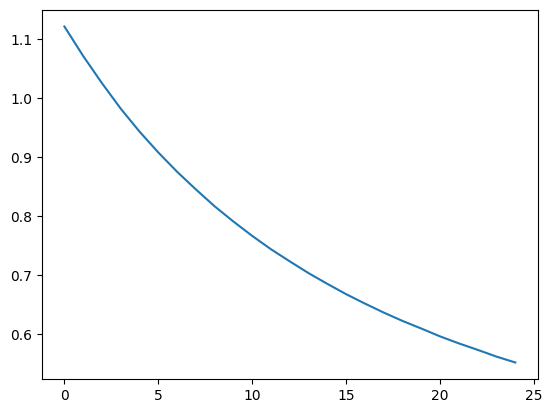

In [14]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'])

In [15]:
loss, acc, f1 = model.evaluate(X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step - accuracy: 0.8333 - f1_score: 0.8222 - loss: 0.5181


In [32]:
y_pred = tf.one_hot(
    np.argmax(model.predict(X_test), axis =1),
    depth = 3
).numpy()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [30]:
from sklearn.metrics import confusion_matrix

In [18]:
confusion_matrix(
    onehot_encoder.inverse_transform(y_test), onehot_encoder.inverse_transform(y_pred)
)

array([[10,  0,  0],
       [ 0,  5,  5],
       [ 0,  0, 10]])

In [19]:
scaled_data = scaler.transform([[0.5,2.1,0.66,0.2]])

In [20]:
y_pred = tf.one_hot(
    np.argmax(model.predict(scaled_data), axis =1),
    depth = 3
).numpy()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


In [21]:
onehot_encoder.inverse_transform(y_pred)

array([['Iris-setosa']], dtype=object)

## Packaging a model and scalers

In [22]:
model.save("iris_class_tf.keras")

In [23]:
import pickle

In [44]:
to_package = {
    "scaler": scaler,
    "encoder": onehot_encoder,
    "tf_model": model
}

with open("iris_processor.pkl", "wb") as file:
    pickle.dump(to_package, file)